In [1]:
from Bio import SeqIO
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mcp_table = pd.read_csv('../Updated-RBP_V5_MCP.txt', sep='\t')

In [3]:
def make_key(d):
    return f'{d["Symbol"]}_{"_".join([i.strip(" ") for i in str(d["Accession"]).replace(".", "-").split(",")])}'

In [4]:
mcp_table['key'] = mcp_table.apply(make_key, axis=1)

In [5]:
mcp_table.head()

,Plate Location,Symbol,Gene ID,Size,Accession,nt_sequence,aa_sequence,Backup 96wp,Midiprep,Jon_Miniprep,Jon_Miniprep_50ngul,Glycerol Stock,Dot Blot Validation,key
0,GYRBP001.A01,CPNE3,8895.0,135.0,BC015734.1,ATGCTTGGAAACAGCATAGATATGTTGCTGTGGTTTTCAGAATTTT...,MLGNSIDMLLWFSEFSLLITRSLLKNDLHIFSCTVKQTEVSLSV,NaN,NaN,NaN,1,NaN,NaN,CPNE3_BC015734-1
1,GYRBP001.B01,RBMS1,5937.0,171.0,"BC065192.1, BC080620.1",ATGTATGGACACACACAAACAAAAAAGCATGAAGGAAGATTTGGAT...,MYGHTQTKKHEGRFGSKQCHTLHHHYKCSSVKKTNFETMKFLIHKY...,NaN,NaN,NaN,1,NaN,NaN,RBMS1_BC065192-1_BC080620-1
2,GYRBP001.C01,NOP10,55505.0,195.0,BC008886.2,ATGTTTCTCCAGTATTACCTCAACGAGCAGGGAGATCGAGTCTATA...,MFLQYYLNEQGDRVYTLKKFDPMGQQTCSAHPARFSPDDKYSRHRI...,NaN,NaN,NaN,1,NaN,NaN,NOP10_BC008886-2
3,GYRBP001.D01,FNDC3B,64778.0,204.0,BC012204.1,ATGATGATGACCGACCAAATCCCTCTGGAACTGCCACCATTGCTGA...,MMMTDQIPLELPPLLNGEVAMMPHLVNGDAAQQVILVQVNPGETFT...,NaN,NaN,NaN,0,NaN,NaN,FNDC3B_BC012204-1
4,GYRBP001.E01,RPS28,6234.0,210.0,"BC000354.1, BC021239.2",ATGGACACCAGCCGTGTGCAGCCTATCAAGCTGGCCAGGGTCACCA...,MDTSRVQPIKLARVTKVLGRTGSQGQCTQVRVEFMDDTSRSIIRNV...,NaN,NaN,NaN,1,NaN,NaN,RPS28_BC000354-1_BC021239-2


In [6]:
downstream_activator = pd.read_csv('../downstream_positive_validation_mean_normalized.txt', sep='\t')
downstream_activator['key'] = downstream_activator.apply(make_key, axis=1)

In [7]:
upstream_activator = pd.read_csv('../upstream_positive_validation_mean_normalized.txt', sep='\t')
upstream_activator['key'] = upstream_activator.apply(make_key, axis=1)

In [8]:
activators = set(downstream_activator['key']).union(set(upstream_activator['key']))

In [9]:
mcp_table['Activator_label'] = mcp_table['key'].isin(activators)

In [10]:
mcp_table_filtered = mcp_table.dropna(subset='aa_sequence')

In [11]:
background = set(pd.read_csv('background_accessions_may2025.txt', header=None)[0])

In [12]:
mcp_table_filtered = mcp_table_filtered[mcp_table_filtered['key'].isin(background)]

In [13]:
mcp_table_filtered['Activator_label'].value_counts()

Activator_label
False    711
True     169
Name: count, dtype: int64

In [14]:
mcp_table_filtered = mcp_table_filtered[['key',  'aa_sequence', 'Activator_label']].drop_duplicates('key')

In [15]:
sequence_out = '/tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/hydra_2/train_test_eval_noppipia/sequence_files_initial_eval_noppinopia'

In [16]:
# for index, row in mcp_table_filtered.iterrows():
#     file_name=f'{row["key"]}.fasta'
#     #print(file_name)
#     with open(os.path.join(sequence_out, file_name), 'w') as sequence_out_file:
#         sequence_out_file.write(f'>{row["key"]}\n')
#         sequence_out_file.write(f'{row["aa_sequence"]}\n')


In [17]:
activators = mcp_table_filtered[mcp_table_filtered['Activator_label']==True]['key'].tolist()

In [18]:
# with open(f'activators.txt', 'w') as activators_file:
#     for c in activators:
#         activators_file.write(c + '\n')

In [19]:
similarity_df = pd.read_csv('/tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/hydra_2/seq_similarity/result.m8', sep='\t', header=None)

In [20]:
pct = 0.8
e_val = 1e-10

similarity_df_filtered = similarity_df[(similarity_df[0] != similarity_df[1]) & (similarity_df[2] > pct) & (similarity_df[10] <e_val) ].sort_values(by=10, ascending=False)

In [21]:
similarity_df_filtered.head()

,0,1,2,3,4,5,6,7,8,9,10,11
699,NDUFV3_BC021217-2,NDUFV3_BC033766-1,0.962,53,2,0,421,473,56,108,2.449000e-27,113
344,NDUFV3_BC033766-1,NDUFV3_BC021217-2,1.000,51,0,0,58,108,423,473,2.274000e-31,113
1249,SRSF8_BC057783-1,SRSF2_BC066958-1,0.810,79,15,0,1,79,1,79,3.329000e-37,138
1224,SRSF2_BC066958-1,SRSF8_BC057783-1,0.810,79,15,0,1,79,1,79,2.049000e-38,137
1124,RBBP6_BC172357,RBBP6_BC029352-1,0.990,102,1,0,1,102,1,102,3.210000e-54,206


In [22]:
sim_seq_proteins = set(similarity_df_filtered[0]).union(similarity_df_filtered[1])

In [23]:
len(sim_seq_proteins)

235

In [24]:
similarity_df_filtered['gene1_activator_label'] = similarity_df_filtered.apply(lambda x: 1 if x[0] in activators else 0, axis=1)
similarity_df_filtered['gene2_activator_label'] = similarity_df_filtered.apply(lambda x: 1 if x[1] in activators else 0, axis=1)

In [25]:
def are_both_activators(df):
    if df['gene1_activator_label'] ==0 and df['gene2_activator_label']==0:
        return 'neither'
    elif (df['gene1_activator_label'] ==1 and df['gene2_activator_label']==0) or (df['gene1_activator_label'] ==0 and df['gene2_activator_label']==1):
        return 'one'
    else:
        return 'both'

In [26]:
similarity_df_filtered['pair_key'] = similarity_df_filtered.apply(lambda row: tuple(sorted([row[0], row[1]])), axis=1)

In [27]:
similarity_df_filtered_unique_pairs = similarity_df_filtered.drop_duplicates(subset='pair_key').drop(columns='pair_key')

In [28]:
similarity_df_filtered_unique_pairs['are_both'] = similarity_df_filtered_unique_pairs.apply(are_both_activators, axis=1)

<Axes: ylabel='are_both'>

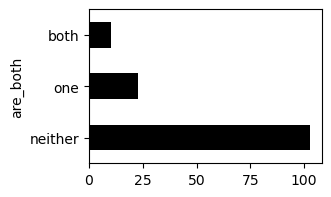

In [29]:
plt.figure(figsize=(3, 2))
similarity_df_filtered_unique_pairs['are_both'].value_counts().plot.barh(color='black')

In [30]:
similarity_df_filtered

,0,1,2,3,4,5,6,7,8,9,10,11,gene1_activator_label,gene2_activator_label,pair_key
699,NDUFV3_BC021217-2,NDUFV3_BC033766-1,0.962,53,2,0,421,473,56,108,2.449000e-27,113,0,0,"(NDUFV3_BC021217-2, NDUFV3_BC033766-1)"
344,NDUFV3_BC033766-1,NDUFV3_BC021217-2,1.000,51,0,0,58,108,423,473,2.274000e-31,113,0,0,"(NDUFV3_BC021217-2, NDUFV3_BC033766-1)"
1249,SRSF8_BC057783-1,SRSF2_BC066958-1,0.810,79,15,0,1,79,1,79,3.329000e-37,138,1,1,"(SRSF2_BC066958-1, SRSF8_BC057783-1)"
1224,SRSF2_BC066958-1,SRSF8_BC057783-1,0.810,79,15,0,1,79,1,79,2.049000e-38,137,1,1,"(SRSF2_BC066958-1, SRSF8_BC057783-1)"
1124,RBBP6_BC172357,RBBP6_BC029352-1,0.990,102,1,0,1,102,1,102,3.210000e-54,206,0,1,"(RBBP6_BC029352-1, RBBP6_BC172357)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,HSP90AB1_BC004928-1_BC012807-2,HSP90AA1_BC121062-2,0.857,732,103,0,1,724,1,732,0.000000e+00,1227,0,0,"(HSP90AA1_BC121062-2, HSP90AB1_BC004928-1_BC01..."
1045,EIF2C2_BC018727-1,EIF2C1_BC063275-1,0.873,585,74,0,1,585,273,857,0.000000e+00,1083,0,0,"(EIF2C1_BC063275-1, EIF2C2_BC018727-1)"
1052,TSR1_BC019090-2,TSR1_BC126110-1,0.998,656,1,0,1,656,149,804,0.000000e+00,1324,0,0,"(TSR1_BC019090-2, TSR1_BC126110-1)"
32,RBM26_BC111697-1,RBM26_BC041655-1,0.996,983,4,0,1,983,1,980,0.000000e+00,1862,0,0,"(RBM26_BC041655-1, RBM26_BC111697-1)"


In [31]:
from sklearn.model_selection import StratifiedKFold, train_test_split

In [32]:
train_test_out_10 = '/tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/hydra_2/train_test_eval_noppipia/train_eval_out_10_nosim_wheldout/'

In [33]:
label_table = mcp_table_filtered[~mcp_table_filtered['key'].isin(sim_seq_proteins)][['key', "Activator_label"]].copy()

In [34]:
label_table_final, held_out = train_test_split(
    label_table, test_size=0.1, stratify=label_table['Activator_label'], random_state=42
)

In [35]:
label_table_final.shape

(572, 2)

In [36]:
held_out.shape

(64, 2)

In [43]:
#held_out.to_csv('./train_eval_out_10_nosim_wheldout/RBP_train_test_eval_bkg_corrected_nosim_heldout.tsv', sep='\t', index=False)

In [39]:
def stratified_k_fold_split(num_splits, train_test_out):
    # Prepare for stratified k-fold
    skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)
    
    for fold, (train_idx, test_idx) in enumerate(skf.split(label_table_final['key'], label_table_final['Activator_label'])):
        train_ids = label_table_final.iloc[train_idx]['key']
        test_ids = label_table_final.iloc[test_idx]['key']
        
        # Save to text files (one UniProt ID per line)
        train_ids.to_csv(os.path.join(train_test_out, f"fold_{fold}_train.txt"), index=False, header=False)
        test_ids.to_csv(os.path.join(train_test_out, f"fold_{fold}_test.txt"), index=False, header=False)

In [40]:
def train_eval_commands(num_splits, train_test_out):
    for i in range(num_splits):
        cmd = f'HydRa2_train_eval --model_name fold_{i} ' 
        cmd += f'--model_outdir {train_test_out}/fold_{i} '
        cmd += f'-s /tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/hydra_2/train_test_eval_noppipia/sequence_files_initial_eval_noppinopia/ '
        cmd += f'--train_list {os.path.join(train_test_out, f"fold_{i}_train.txt")} '
        cmd += f'--test_list {os.path.join(train_test_out, f"fold_{i}_test.txt")} '
        cmd += f'--no-PIA '
        cmd += f'--no-PPA '
        cmd += f'--RBP_list /tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/hydra_2/train_test_eval_noppipia/activators.txt '
        cmd += f'--ProteinBERT_pretrainedBeforeFinetune_model /tscc/nfs/home/wjin/projects/RBP_pred/RBP_identification/HydRa2.0/data/ProteinBERT/default.pkl'
    
        print(cmd)
        print()
    
    

In [41]:
stratified_k_fold_split(10, train_test_out_10)

In [42]:
train_eval_commands(10, train_test_out_10)

HydRa2_train_eval --model_name fold_0 --model_outdir /tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/hydra_2/train_test_eval_noppipia/train_eval_out_10_nosim_wheldout//fold_0 -s /tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/hydra_2/train_test_eval_noppipia/sequence_files_initial_eval_noppinopia/ --train_list /tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/hydra_2/train_test_eval_noppipia/train_eval_out_10_nosim_wheldout/fold_0_train.txt --test_list /tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/hydra_2/train_test_eval_noppipia/train_eval_out_10_nosim_wheldout/fold_0_test.txt --no-PIA --no-PPA --RBP_list /tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/hydra_2/train_test_eval_noppipia/activators.txt --ProteinBERT_pretrainedBeforeFinetune_model /tscc/nfs/home/wjin/projects/RBP_pred/RBP_identification/HydRa2.0/data/ProteinBERT/default.pkl

HydRa2_train_eval --model_name fold_1 --model_outdir /tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/hydra_